<a href="https://colab.research.google.com/github/YheChen/LearningML/blob/main/IrisFlower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

KNN Classification

In [25]:
iris = load_iris()
x = iris.data
y = iris.target

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("First 5 samples:\n", x[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



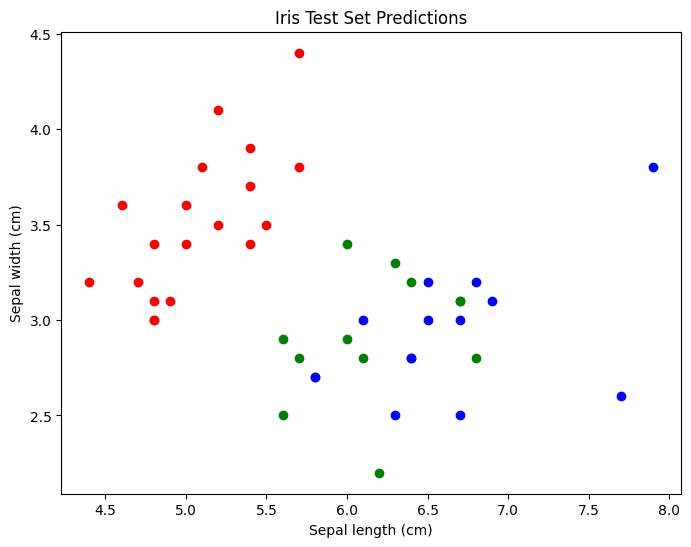

In [36]:
plt.figure(figsize=(8, 6))
for i in range(len(x_test)):
    plt.scatter(x_test[i][0], x_test[i][1], color=["red", "green", "blue"][y_pred[i]])

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Iris Test Set Predictions")
plt.show()

Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini",
                             max_depth=None,
                             random_state=42
                             )

In [40]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
y_pred = clf.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



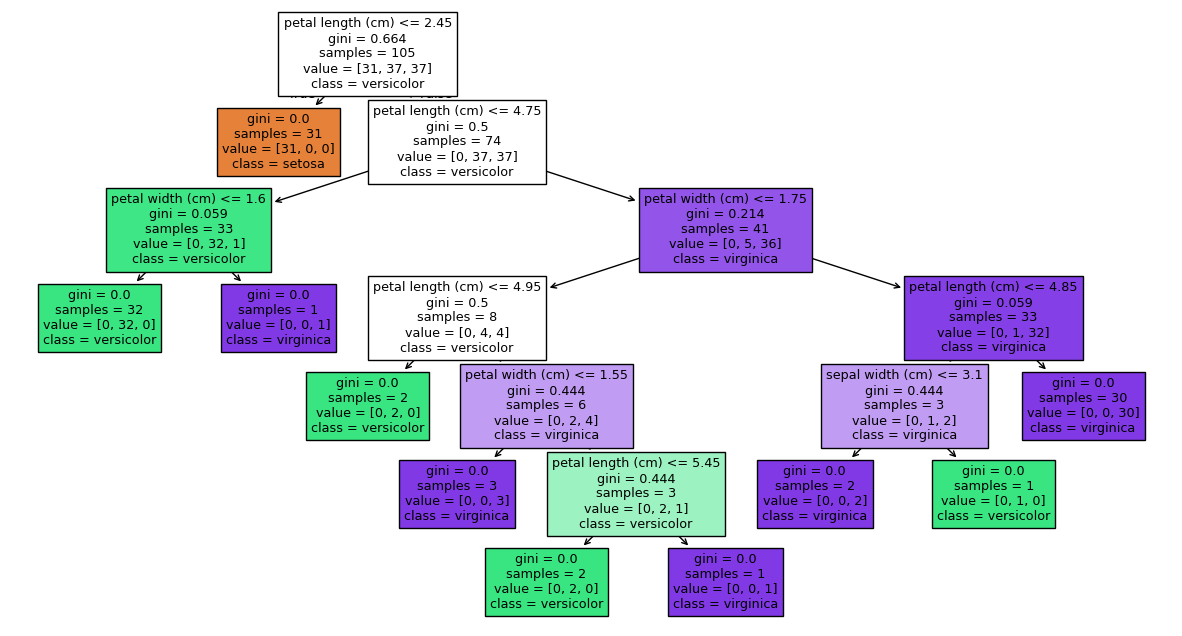

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [46]:
print("Tree depth:", clf.get_depth())
print("Number of leaves:", clf.get_n_leaves())


Tree depth: 6
Number of leaves: 10


Adjusted Rand Index: 0.9038742317748124


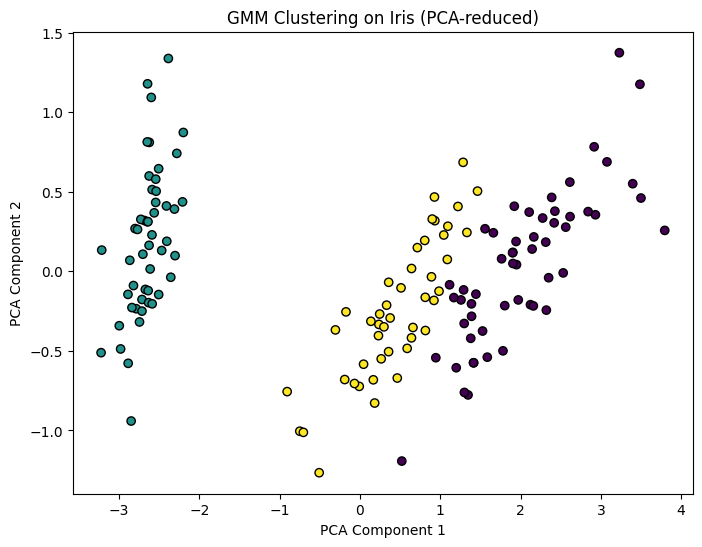

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

# Load Iris data
iris = load_iris()
X = iris.data
y_true = iris.target

# Fit GMM with 3 components (since Iris has 3 species)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict cluster labels
y_gmm = gmm.predict(X)

# Evaluate clustering performance
ari = adjusted_rand_score(y_true, y_gmm)
print("Adjusted Rand Index:", ari)

# Visualize using PCA (2D projection)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_gmm, cmap='viridis', edgecolor='k')
plt.title("GMM Clustering on Iris (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
